 # 1: Installation and setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 2: Data Preprocessing

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Loading the dataset
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [ ]:
np.max(y_train), np.min(y_train), np.mean(y_train)

(9, 0, 4.5)

In [ ]:
class_names = ['0 Top/T-shirt','1 Trouser', '2 Pullover', '3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker', '8 bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 bag', '9 Ankle boot']


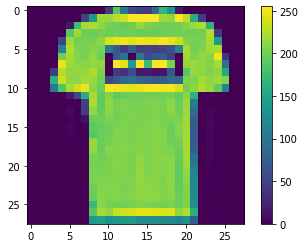

In [ ]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
y_train[1]

0

In [ ]:
# Normalizing the dataset
x_train = x_train/255.0
x_test = x_test/ 255.0

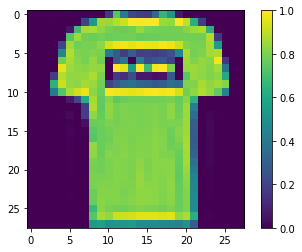

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()


In [ ]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

#3) Building the model

In [ ]:
# define an object
model = tf.keras.models.Sequential()
# sequence of layers


In [ ]:
# Adding first fully connected hidden layer
# 1) units(No of neurons)= 128
# 2) activation function = ReLU
# 3) imput shape = 784
model.add(tf.keras.layers.Dense(units = 128, activation= 'relu', input_shape = (784,)))


In [ ]:
# Adding the secong layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [ ]:
# Addding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units =10, activation='softmax'))

# 4: Training the model

In [ ]:
# Compiling the model
# 1) Optimizer = adam,  (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) matrics = sparse_categorical_accuracy

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model.fit(x_train, y_train, epochs= 10 )


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4224 - sparse_categorical_accuracy: 0.5787
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8501 - sparse_categorical_accuracy: 0.6866
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6980 - sparse_categorical_accuracy: 0.7449
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6032 - sparse_categorical_accuracy: 0.7931
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5506 - sparse_categorical_accuracy: 0.8052
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5166 - sparse_categorical_accuracy: 0.8136
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4909 - sparse_categorical_accuracy: 0.8211
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4714 - sparse_categorical_accuracy: 0.8306
Epoch 9/10
1875/1875 [==========

In [ ]:
model.fit(x_train, y_train, epochs= 10 )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4134 - sparse_categorical_accuracy: 0.8639
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4004 - sparse_categorical_accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3916 - sparse_categorical_accuracy: 0.8698
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3860 - sparse_categorical_accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3781 - sparse_categorical_accuracy: 0.8741
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3710 - sparse_categorical_accuracy: 0.8763
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3673 - sparse_categorical_accuracy: 0.8763
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3610 - sparse_categorical_accuracy: 0.8784
Epoch 9/10
1875/1875 [==========

# 5: Model evaluation and prediction

In [ ]:
# MOdel evaluation
test_loss , test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4039 - sparse_categorical_accuracy: 0.8692


In [ ]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8691999912261963


In [ ]:
# Model prediction
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [ ]:
y_pred[0] , y_test[0]
# predicted output and actual output

(9, 9)

In [ ]:
y_pred[110] , y_test[110]
# predicted output and actual output

(2, 2)

In [ ]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 bag', '9 Ankle boot']


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[846   1   2  24   4   3 107   0  13   0]
 [  1 956   0  31   7   0   3   0   2   0]
 [ 14   1 734   5 118   0 120   0   8   0]
 [ 26   7   3 868  41   1  49   0   4   1]
 [  1   0 108  26 778   1  83   0   3   0]
 [  0   0   0   0   0 943   0  27   2  28]
 [148   0  81  19  70   0 665   0  17   0]
 [  0   0   0   0   0   8   0 978   0  14]
 [  2   0   1   1   1   2   9   3 981   0]
 [  1   0   0   0   0   4   0  52   0 943]]


In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8692
